In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
df=pd.read_csv('D:/DSData/winequality-red.csv')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Univariate Analysis

In [9]:
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

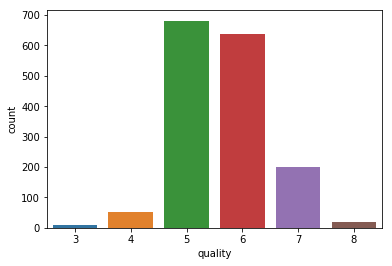

In [8]:
import seaborn as sns
sns.countplot(x='quality', data=df)

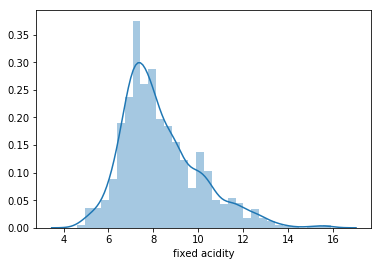

In [11]:
import seaborn as sns
sns.distplot(df['fixed acidity'])
plt.show()

# Bivariate Analysis

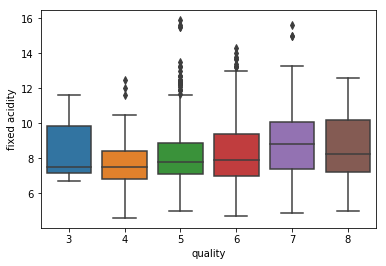

In [12]:
sns.boxplot('quality', 'fixed acidity', data = df)

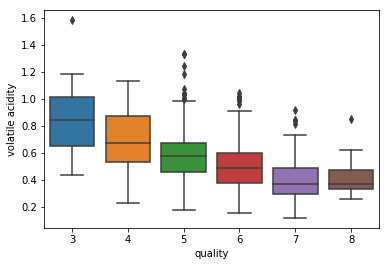

In [13]:
sns.boxplot('quality', 'volatile acidity', data = df)

# Heatmap

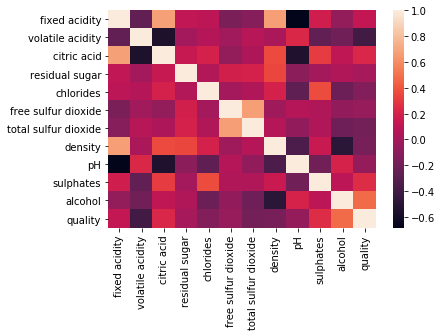

In [14]:
heat_map = sns.heatmap(df.corr())

# Removing outliers

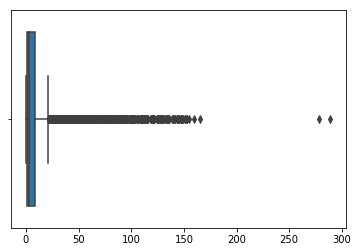

In [15]:
sns.boxplot(df)

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df))
df1 = df[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [17]:
df.shape

(1599, 12)

In [18]:
df1.shape

(1451, 12)

In [22]:
import warnings
warnings.filterwarnings('ignore')
reviews = []
for i in df1['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df1['Reviews'] = reviews

In [23]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [24]:
x = df1.iloc[:,:-2]
y = df1['Reviews']

In [25]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

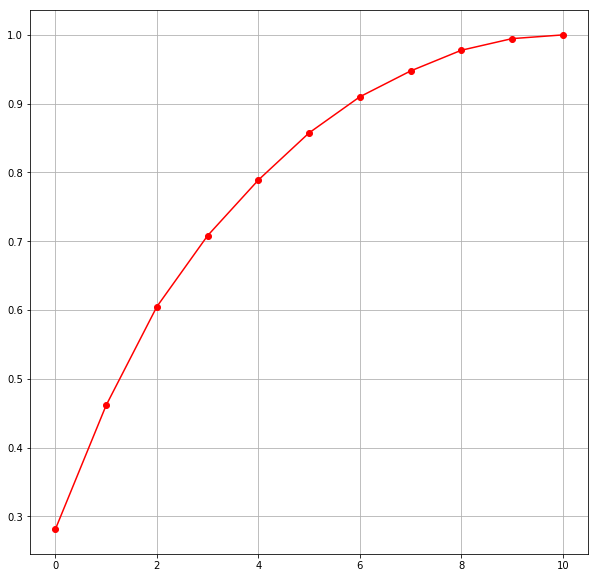

In [27]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [28]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [31]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[360   0]
 [  3   0]]
99.17355371900827


In [32]:
#set seed for reproducibility
seed = 4
np.random.seed(seed)
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=8))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#train model
model.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
1088/1088 [==============================] - 0s 208us/step - loss: 4.9779
Epoch 2/100
1088/1088 [==============================] - 0s 74us/step - loss: 3.7679
Epoch 3/100
1088/1088 [==============================] - 0s 63us/step - loss: 2.8514
Epoch 4/100
1088/1088 [==============================] - 0s 72us/step - loss: 1.7413
Epoch 5/100
1088/1088 [==============================] - 0s 67us/step - loss: 0.7381
Epoch 6/100
1088/1088 [==============================] - 0s 67us/step - loss: 0.3618
Epoch 7/100
1088/1088 [==============================] - 0s 75us/step - loss: 0.2382
Epoch 8/100
1088/1088 [==============================] - 0s 65us/step - loss: 0.1832
Epoch 9/100
1088/1088 [==============================] - 0s 64us/step - loss: 0.1531
Epoch 10/100
1088/1088 [==============================] - 0s 64us/step - loss: 0.1347
Epoch 11/100
1088/1088 [==============================] - 0s 67us/step - loss: 0.1221
Epoch 12/100
1088/1088 [==============================] - 0s 6

In [38]:
#perform evaluation on train and test set
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.017268274301669412
MSE on test set = 0.01577920863213138


In [39]:
model.save('Red_wine')